In [1]:
from fastai.vision import *

In [2]:
folder = 'soccer_ball'
file = 'soccer.txt'

In [3]:
folder = 'cricket_ball'
file = 'cricket.txt'

In [4]:
folder = 'basketball'
file = 'basketball.txt'

In [5]:
path = Path('data/balls')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

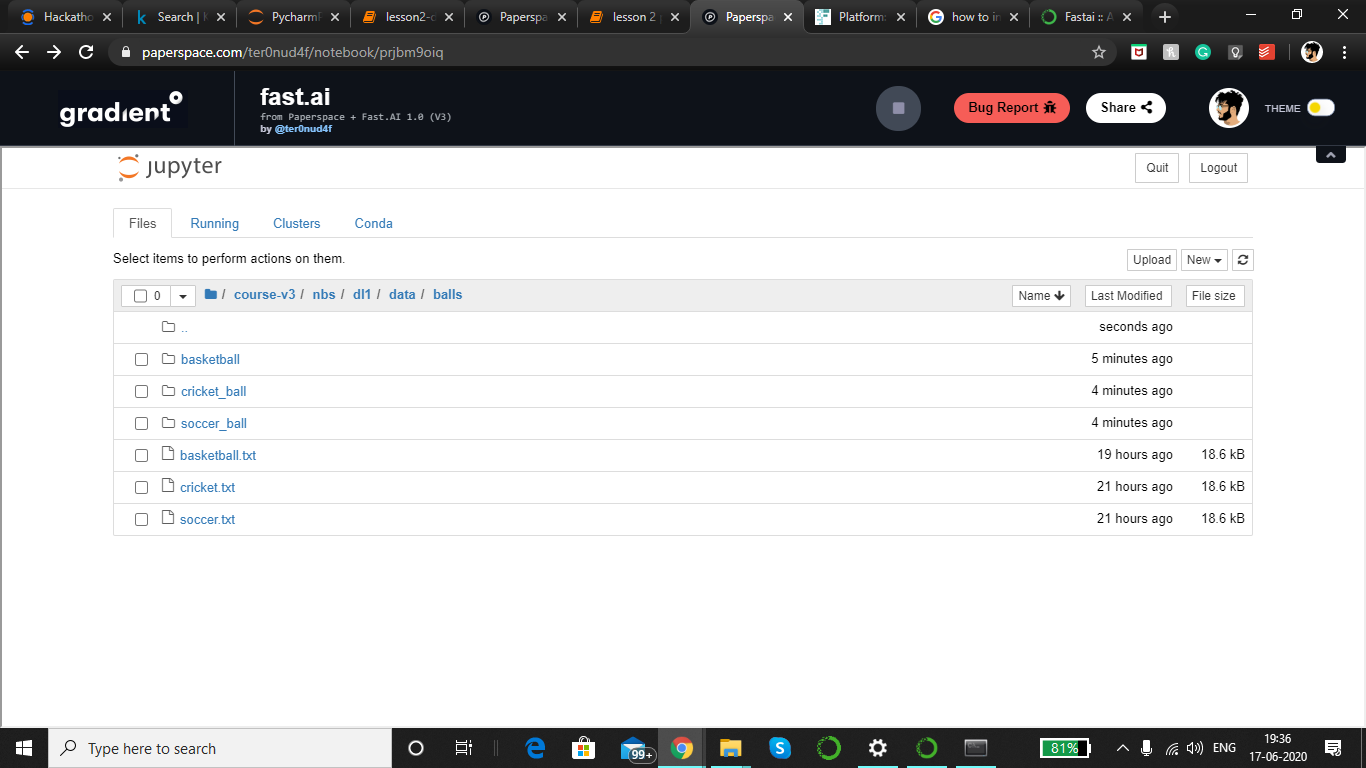

In [6]:
path.ls()

[PosixPath('data/balls/cleaned.csv'),
 PosixPath('data/balls/basketball'),
 PosixPath('data/balls/soccer_ball'),
 PosixPath('data/balls/soccer.txt'),
 PosixPath('data/balls/cricket_ball'),
 PosixPath('data/balls/export.pkl'),
 PosixPath('data/balls/cricket.txt'),
 PosixPath('data/balls/.ipynb_checkpoints'),
 PosixPath('data/balls/basketball.txt'),
 PosixPath('data/balls/models')]

In [7]:
download_images(path/file, dest, max_pics=250)

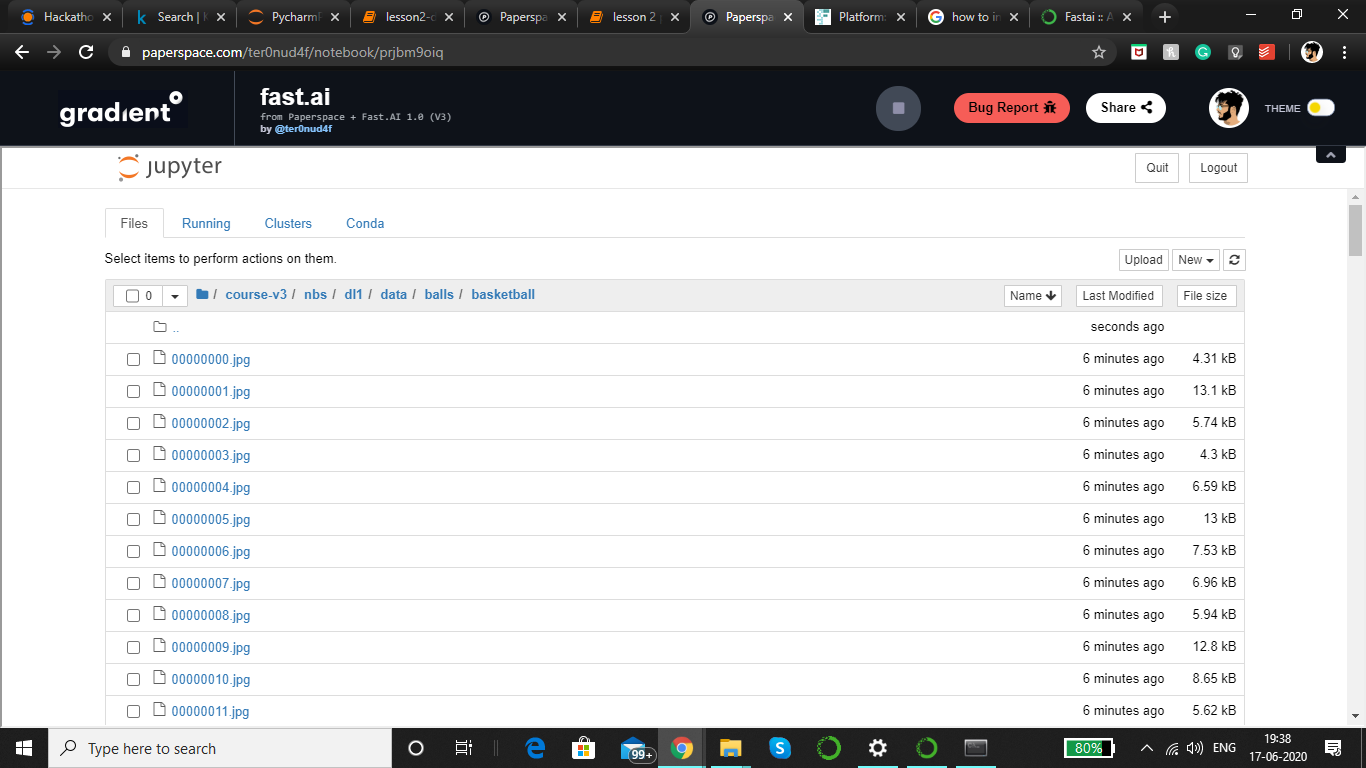

In [8]:
classes = ['basketball','cricket_ball','soccer_ball']

In [9]:
help(download_images)

Help on function download_images in module fastai.vision.data:

download_images(urls:Union[pathlib.Path, str], dest:Union[pathlib.Path, str], max_pics:int=1000, max_workers:int=8, timeout=4)
    Download images listed in text file `urls` to path `dest`, at most `max_pics`



In [10]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

basketball


cricket_ball


soccer_ball


In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['basketball', 'cricket_ball', 'soccer_ball']

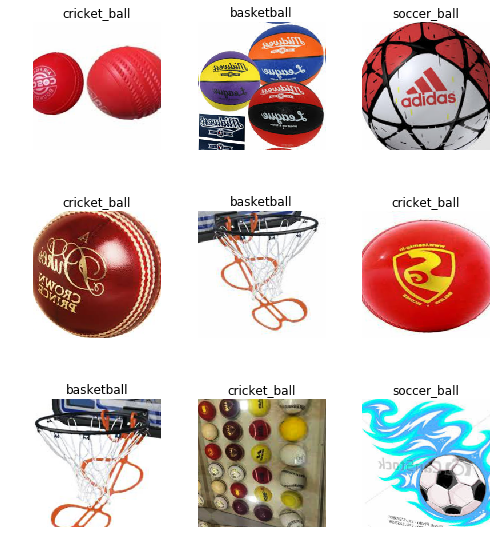

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['basketball', 'cricket_ball', 'soccer_ball'], 3, 384, 96)

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.397240,0.126139,0.052083,00:03
1,0.799274,0.114122,0.031250,00:02
2,0.546667,0.130455,0.031250,00:02
3,0.404669,0.129047,0.031250,00:02


In [17]:
learn.save('stage-1')

In [18]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


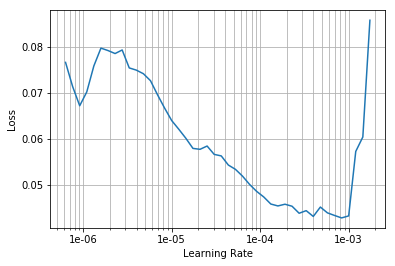

In [20]:
learn.recorder.plot(show_grid=True)

In [21]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.100951,0.103882,0.031250,00:02
1,0.055066,0.144299,0.031250,00:02
2,0.052878,0.121580,0.020833,00:02
3,0.042110,0.122668,0.020833,00:02


In [22]:
learn.save('stage-2')

In [23]:
learn.load('stage-2');

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

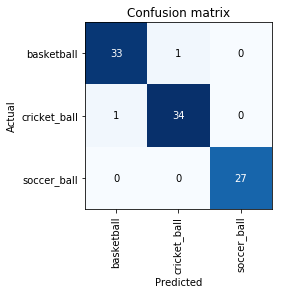

In [25]:
interp.plot_confusion_matrix()

In [26]:
from fastai.widgets import *

In [27]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [28]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [29]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [30]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [31]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [32]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [33]:
learn.export()

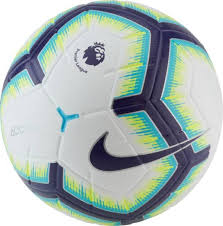

In [34]:
img = open_image(path/'soccer_ball'/'00000021.jpg')
img

In [35]:
learn = load_learner(path)

In [36]:
classes = ['basketball', 'cricket_ball', 'soccer_ball']
data2 = ImageDataBunch.single_from_classes(path,classes,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2');

/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [37]:

pred_class,pred_idx,outputs = learn.predict(img)
if pred_idx == tensor(0):
    print('basketball')
elif pred_idx == tensor(1):
    print('cricket_ball')
else:
    print('soccer_ball')

soccer_ball
